## Lidl Use Case : Die Analyse für die besten Süßigkeiten Aromen

### Uma Nitturi, 15.06.2021

### 1)Importieren der wichtigen Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyensae.graphhelper import Corrplot
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

### 2) Importieren des Datensatzes von Github

In [2]:
url_data = "https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv"
df = pd.read_csv(url_data)
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


### 3) Datenaufbereitung

#### Abrufen der Dateninformationen

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


#### Der gesamte Datensatz besteht aus 85 Zeilen und 13 Spalten. Jede Spalte hat 85 Einträge. Das bedeutet, dass die Daten vollständig sind. Count bedeutet, dass keine Nullwerte vorhanden sind und es nur gültige Datentypen gibt.

#### Markennamen können aus dem Datensatz gelöscht werden, da wir uns auf Aromen konzentrieren. Von diesen können wir die Dimension reduzieren. Der Winpercent-Wert wurde geändert, zwischen 0 und 1, damit alle Prozente in der gleichen Einheit sind.

In [4]:
df_1 = df.drop('competitorname', axis=1)
df_1['winpercent'] = df_1['winpercent']/100
df_1

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,0.669717
1,1,0,0,0,1,0,0,1,0,0.604,0.511,0.676029
2,0,0,0,0,0,0,0,0,0,0.011,0.116,0.322611
3,0,0,0,0,0,0,0,0,0,0.011,0.511,0.461165
4,0,1,0,0,0,0,0,0,0,0.906,0.511,0.523415
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,0.454663
81,0,1,0,0,0,0,1,0,0,0.093,0.116,0.390119
82,0,1,0,0,0,0,0,0,1,0.313,0.313,0.443755
83,0,0,1,0,0,0,1,0,0,0.186,0.267,0.419043


#### Deskriptive Analyse

In [5]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.00000,1.000000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.00000,1.000000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.00000,1.000000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.00000,1.000000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.00000,1.000000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.00000,1.000000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.00000,1.000000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.00000,1.000000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.00000,1.000000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.73200,0.988000


####  Der Durchschnittswert jedes Faktors bei allen Marken lag im Mittel. Wir können beobachten, ob es bei Min und Max Ausreißer gibt. Dies ist ein sehr guter Datensatz. Keine Ausreißer.

In [6]:
df_1.sort_values("winpercent", axis = 0, ascending = False,  inplace = True, na_position ='last')
df_1

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,1,0,0,1,0,0,0,0,0,0.720,0.651,0.841803
51,1,0,0,1,0,0,0,0,0,0.034,0.279,0.818663
79,1,0,1,0,0,1,0,1,0,0.546,0.906,0.816429
28,1,0,0,0,0,1,0,1,0,0.313,0.511,0.767686
64,1,0,1,1,1,0,0,1,0,0.546,0.651,0.766738
...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,1,0,0,0,0,1,0,1,0.093,0.511,0.281274
72,0,1,0,0,0,0,0,0,0,0.162,0.116,0.273039
12,0,1,0,0,0,0,0,0,1,0.046,0.325,0.245250
7,0,0,0,1,0,0,0,0,1,0.313,0.511,0.234178


#### Von diesen Ergebnisse ist die Wahl der Leute Schokolade mit Nuss. Die Ergebnisse zeigen aber nicht ob die neue Süßigkeit  hart oder weich, bar oder Pluribus sein soll. Und auch wie der Preis und der Zuckerprozentsatz den Gewinnprozentsatz beeinflussen. Schauen wir uns dazu die Korrelationskoeffizienten an, aus denen wir die Informationen über Beziehungen erhalten.

### 3) Korrelation aller Faktoren mit winpercent

#### aus dem Datensatz winpercent ist die Zielvariable und unser Ziel ist es herauszufinden, welche Faktoren mit diesem winpercent verbunden sind.

In [7]:
corr = df_1.corr()["winpercent"]

corr.sort_values(ascending=False)

winpercent          1.000000
chocolate           0.636517
bar                 0.429929
peanutyalmondy      0.406192
pricepercent        0.345325
crispedricewafer    0.324680
sugarpercent        0.229151
caramel             0.213416
nougat              0.199375
pluribus           -0.247448
hard               -0.310382
fruity             -0.380938
Name: winpercent, dtype: float64

#### Als Faustregel für die Interpretation der Größe des Korrelationskoeffizienten gilt::
        1.0   – 0.8 → Very strong
        0.799 – 0.6 → Strong
        0.599 – 0.4 → Moderate
        0.399 – 0.2 → Weak
        0.199 – 0.0 → Very Weak

<AxesSubplot:>

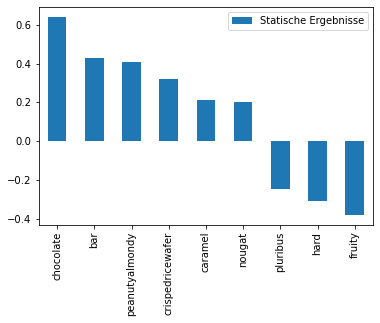

In [8]:
plotdata = pd.DataFrame(
    {"Statische Ergebnisse": [0.64, 0.43, 0.41, 0.32, 0.21, 0.20, -0.25, -0.31, -0.38]}, 
    index=['chocolate', 'bar', 'peanutyalmondy', 'crispedricewafer', 'caramel', 
             'nougat', 'pluribus', 'hard', 'fruity'])
# Plot a bar chart
plotdata.plot(kind="bar")

#### Visualisierung der Korrelationsmatrix

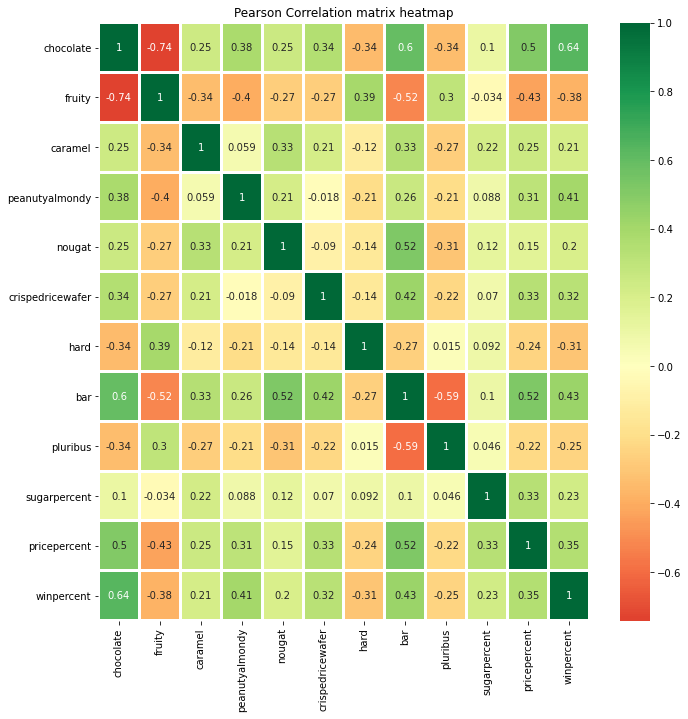

In [9]:
plt.subplots(figsize=(11,11));
sns.heatmap(df_1.corr(),annot=True, center=0, linewidths=2, cmap="RdYlGn");
plt.title('Pearson Correlation matrix heatmap');

#### Es ist klar. Menschen mögen weiche Schokoladen mit Nüssen und als Riegel(bar), da diese im Vergleich zu anderen Faktoren eine starke Korrelation aufweisen. Fruchtig, hart und pluribus haben die negative Korrelation, dh diese Faktoren stehen in umgekehrter Beziehung zu Winpercent. Das bedeutet, dass die Leute den weichen, nicht fruchtigen Geschmack eines einzelnen Riegels bevorzugen. 

#### Preis und Zuckeranteil fallen ebenfalls in schwacher Korrelation. Um sicherzustellen, überprüfen Sie einmal die Streuverteilung.

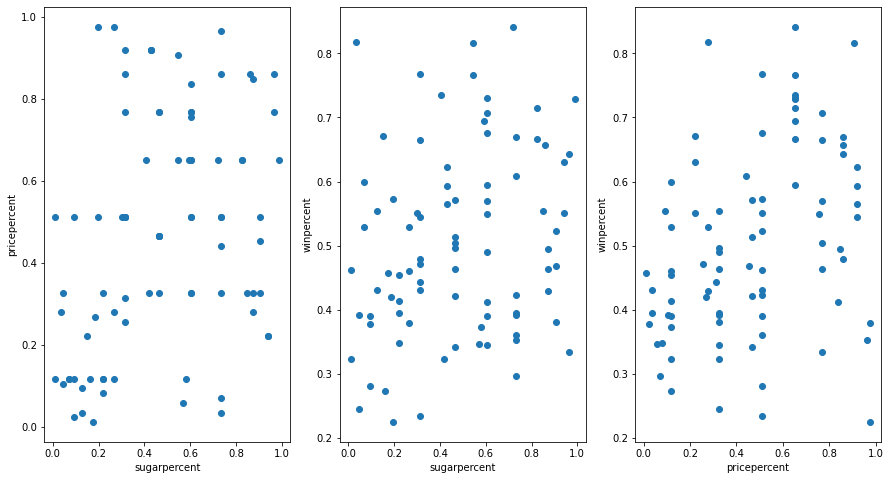

In [10]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)

plt.scatter(df_1['sugarpercent'], df_1['pricepercent'])
plt.xlabel('sugarpercent')
plt.ylabel('pricepercent')


plt.subplot(1, 3, 2)

plt.scatter(df_1['sugarpercent'], df_1['winpercent'])
plt.xlabel('sugarpercent')
plt.ylabel('winpercent')


plt.subplot(1, 3, 3)

plt.scatter(df_1['pricepercent'], df_1['winpercent'])
plt.xlabel('pricepercent')
plt.ylabel('winpercent')

plt.show()



#### Zahlen und Grafiken zeigen, dass es eine schwache positive Korrelation gibt. Wir können diese beiden Spalten also vernachlässigen. Nicht nur diese beiden, sondern auch Crispedricewafer, Caramel und Nougat fallen unter eine schwache Korrelation. Auch diese können wir also vernachlässigen.

 winpercent          1.000000
 chocolate           0.636517
 bar                 0.429929
 peanutyalmondy      0.406192
 ~~pricepercent      0.345325
 crispedricewafer    0.324680
 sugarpercent        0.229151
 caramel             0.213416
 nougat              0.199375
 pluribus           -0.247448
 hard               -0.310382
 fruity             -0.380938~~    

### Wir können die Ergebnisse abschließen. Schokolade (0.636517), Nüsse (0.406192) und Riegel (0.429929) befinden sich in einem starken positiven Korrelationsbereich, so dass wir statistisch schlussfolgern können, dass ein weicher Einzelriegel mit Schokolade und Nussgeschmack am beliebsten in der Wahl sind.